# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

We set the random seed so that the results don't vary drastically.

In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [3]:
train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Project_data/val.csv').readlines())
batch_size = 12#experiment with the batch size

In [4]:
len(train_doc)

663

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [5]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,)

def generator(source_path, folder_list, batch_size,mode='val',img_sz=120):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #create a list of image numbers you want to use for a particular video
    #img_idx =list(range(0,30,2))
    img_idx=[4,5,6,10,15,27,28,29]
    x = len(img_idx)
    y = img_sz
    z = img_sz
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                #as people with main gestures are in the last, we are reversing it for better results
                imgs.sort(reverse=True)
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    img_resize = imresize(image, (y, z))
                    m=img_resize.mean()
                    sig=img_resize.std()
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    #normalise and feed in the batch_data the image
                    batch_data[folder,idx,:,:,0] = (img_resize[:,:,0] - m)/sig
                    batch_data[folder,idx,:,:,1] = (img_resize[:,:,1] - m)/sig
                    batch_data[folder,idx,:,:,2] = (img_resize[:,:,2] - m)/sig
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches
        for folder_oth in range(batch_size):
            imgs = os.listdir(source_path+'/'+ t[(folder_oth + (num_batches*batch_size))%(len(folder_list))].split(';')[0])
            imgs.sort(reverse=True)
            for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[(folder_oth + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    img_resize = imresize(image, (y, z))
                    m=img_resize.mean()
                    sig=img_resize.std()
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    batch_data[folder,idx,:,:,0] = (img_resize[:,:,0] - m)/sig
                    batch_data[folder,idx,:,:,1] = (img_resize[:,:,1] - m)/sig
                    batch_data[folder,idx,:,:,2] = (img_resize[:,:,2] - m)/sig
            batch_labels[folder_oth, int( t[(folder_oth + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

def generator_15(source_path, folder_list, batch_size,mode='val',img_sz=120):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    #create a list of image numbers you want to use for a particular video
    img_idx =list(range(0,30,2))
    #img_idx=[4,5,6,10,15,27,28,29]
    x = len(img_idx)
    y = img_sz
    z = img_sz
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                #as people with main gestures are in the last, we are reversing it for better results
                imgs.sort(reverse=True)
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    img_resize = imresize(image, (y, z))
                    m=img_resize.mean()
                    sig=img_resize.std()
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    #normalise and feed in the batch_data the image
                    batch_data[folder,idx,:,:,0] = (img_resize[:,:,0] - m)/sig
                    batch_data[folder,idx,:,:,1] = (img_resize[:,:,1] - m)/sig
                    batch_data[folder,idx,:,:,2] = (img_resize[:,:,2] - m)/sig
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches
        for folder_oth in range(batch_size):
            imgs = os.listdir(source_path+'/'+ t[(folder_oth + (num_batches*batch_size))%(len(folder_list))].split(';')[0])
            imgs.sort(reverse=True)
            for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[(folder_oth + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    img_resize = imresize(image, (y, z))
                    m=img_resize.mean()
                    sig=img_resize.std()
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    batch_data[folder,idx,:,:,0] = (img_resize[:,:,0] - m)/sig
                    batch_data[folder,idx,:,:,1] = (img_resize[:,:,1] - m)/sig
                    batch_data[folder,idx,:,:,2] = (img_resize[:,:,2] - m)/sig
            batch_labels[folder_oth, int( t[(folder_oth + (num_batches*batch_size))%(len(folder_list))].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
                        

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [17]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 70 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 70


## Best & Final Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [36]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l2
batch_size = 8
x = 8
y = 120
z = 120
no_classes = 5
#write your model here
#Model 1 using 2 con3d layers, 2 maxpool 3d and 2 fully connected
#Result: There seems to be overfitting as the validation loss is increasing while train loss is increasing
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1,2,2)))
#model.add(Dropout(0.05))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.05))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.3))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.23))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [37]:
learning_rate = 0.0001
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 8, 120, 120, 16)   1312      
_________________________________________________________________
batch_normalization_11 (Batc (None, 8, 120, 120, 16)   64        
_________________________________________________________________
activation_11 (Activation)   (None, 8, 120, 120, 16)   0         
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 8, 60, 60, 16)     0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 8, 60, 60, 32)     13856     
_________________________________________________________________
batch_normalization_12 (Batc (None, 8, 60, 60, 32)     128       
_________________________________________________________________
activation_12 (Activation)   (None, 8, 60, 60, 32)     0         
__________

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [38]:
train_generator = generator(train_path, train_doc, batch_size,'train')
val_generator = generator(val_path, val_doc, batch_size,'val')

In [39]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [40]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [35]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = 8
Source path =  Project_data/train Epoch 1/70; batch size =
 8
83/83 [==============================] - 24s 294ms/step - loss: 0.3952 - categorical_accuracy: 0.9759 - val_loss: 1.2224 - val_categorical_accuracy: 0.8558

Epoch 00001: val_categorical_accuracy improved from -inf to 0.85577, saving model to model_init_2020-03-2015_53_50.681880/model-00001-0.39515-0.97590-1.22235-0.85577.h5
Epoch 2/70
83/83 [==============================] - 23s 271ms/step - loss: 0.3707 - categorical_accuracy: 0.9774 - val_loss: 0.9453 - val_categorical_accuracy: 0.9135

Epoch 00002: val_categorical_accuracy improved from 0.85577 to 0.91346, saving model to model_init_2020-03-2015_53_50.681880/model-00002-0.37067-0.97741-0.94533-0.91346.h5
Epoch 3/70
83/83 [==============================] - 23s 274ms/step - loss: 0.3870 - categorical_accuracy: 0.9744 - val_loss: 0.7028 - val_categorical_accuracy: 0.9135

Epoch 00003: val_categorical_accuracy did not improve f


Epoch 00032: val_categorical_accuracy did not improve from 0.93269
Epoch 33/70
83/83 [==============================] - 22s 266ms/step - loss: 0.3887 - categorical_accuracy: 0.9729 - val_loss: 1.0932 - val_categorical_accuracy: 0.8942

Epoch 00033: val_categorical_accuracy did not improve from 0.93269
Epoch 34/70
83/83 [==============================] - 23s 274ms/step - loss: 0.3580 - categorical_accuracy: 0.9774 - val_loss: 0.9995 - val_categorical_accuracy: 0.8846

Epoch 00034: val_categorical_accuracy did not improve from 0.93269
Epoch 35/70
83/83 [==============================] - 23s 275ms/step - loss: 0.3841 - categorical_accuracy: 0.9639 - val_loss: 1.0223 - val_categorical_accuracy: 0.8750

Epoch 00035: val_categorical_accuracy did not improve from 0.93269
Epoch 36/70
83/83 [==============================] - 22s 269ms/step - loss: 0.3908 - categorical_accuracy: 0.9759 - val_loss: 0.8438 - val_categorical_accuracy: 0.8846

Epoch 00036: val_categorical_accuracy did not improve f

# Final model

In [29]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = 8
Source path =  Project_data/train Epoch 1/70
; batch size = 8
83/83 [==============================] - 24s 292ms/step - loss: 0.5116 - categorical_accuracy: 0.9533 - val_loss: 1.0761 - val_categorical_accuracy: 0.8846

Epoch 00001: val_categorical_accuracy improved from -inf to 0.88462, saving model to model_init_2020-03-2015_53_50.681880/model-00001-0.51160-0.95331-1.07611-0.88462.h5
Epoch 2/70
83/83 [==============================] - 22s 265ms/step - loss: 0.4716 - categorical_accuracy: 0.9654 - val_loss: 1.1827 - val_categorical_accuracy: 0.8558

Epoch 00002: val_categorical_accuracy did not improve from 0.88462
Epoch 3/70
83/83 [==============================] - 23s 272ms/step - loss: 0.4950 - categorical_accuracy: 0.9488 - val_loss: 0.8242 - val_categorical_accuracy: 0.8942

Epoch 00003: val_categorical_accuracy improved from 0.88462 to 0.89423, saving model to model_init_2020-03-2015_53_50.681880/model-00003-0.49499-0.94880-0.82418

83/83 [==============================] - 23s 273ms/step - loss: 0.3638 - categorical_accuracy: 0.9774 - val_loss: 1.0314 - val_categorical_accuracy: 0.8750

Epoch 00065: val_categorical_accuracy did not improve from 0.93269
Epoch 66/70
83/83 [==============================] - 23s 274ms/step - loss: 0.3890 - categorical_accuracy: 0.9608 - val_loss: 0.9511 - val_categorical_accuracy: 0.9135

Epoch 00066: val_categorical_accuracy did not improve from 0.93269
Epoch 67/70
83/83 [==============================] - 23s 272ms/step - loss: 0.4075 - categorical_accuracy: 0.9714 - val_loss: 0.8046 - val_categorical_accuracy: 0.9327

Epoch 00067: val_categorical_accuracy did not improve from 0.93269
Epoch 68/70
83/83 [==============================] - 23s 272ms/step - loss: 0.4031 - categorical_accuracy: 0.9714 - val_loss: 0.8582 - val_categorical_accuracy: 0.8942

Epoch 00068: val_categorical_accuracy did not improve from 0.93269
Epoch 69/70
83/83 [==============================] - 23s 275ms/step 

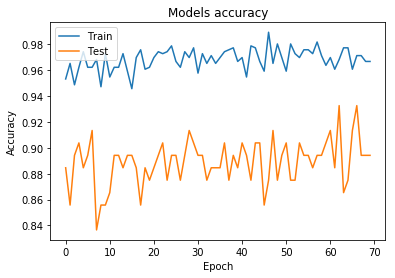

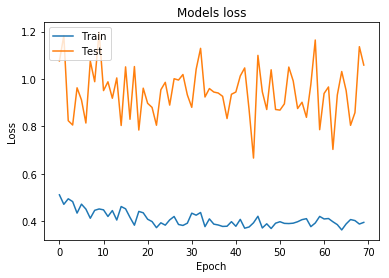

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Models accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Experimental model #1

Source path =  Project_data/val ; batch size = 35
Source path =  Project_data/train ; batch size = 35
Epoch 1/15
19/19 [==============================] - 27s 1s/step - loss: 3.1286 - categorical_accuracy: 0.2752 - val_loss: 3.5856 - val_categorical_accuracy: 0.3048

Epoch 00001: val_categorical_accuracy improved from -inf to 0.30476, saving model to model_init_2020-03-2012_09_57.074837/model-00001-3.12864-0.27519-3.58564-0.30476.h5
Epoch 2/15
19/19 [==============================] - 22s 1s/step - loss: 2.7248 - categorical_accuracy: 0.4165 - val_loss: 3.9473 - val_categorical_accuracy: 0.2381

Epoch 00002: val_categorical_accuracy did not improve from 0.30476
Epoch 3/15
19/19 [==============================] - 23s 1s/step - loss: 2.4801 - categorical_accuracy: 0.5263 - val_loss: 4.6922 - val_categorical_accuracy: 0.2476

Epoch 00003: val_categorical_accuracy did not improve from 0.30476
Epoch 4/15
19/19 [==============================] - 23s 1s/step - loss: 2.3274 - categorical_accurac

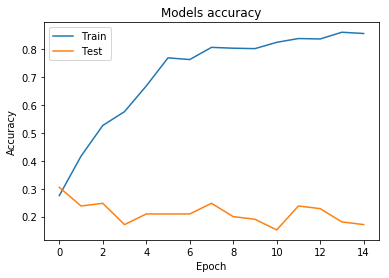

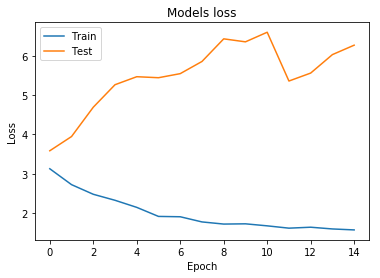

In [15]:
batch_size = 35
num_epochs = 15
x = 8
y = 120
z = 120
no_classes = 5
#write your model here
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1,2,2)))
model.add(Dropout(0.25))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.25))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.3))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

learning_rate = 0.0099
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#print (model.summary())

train_generator = generator(train_path, train_doc, batch_size,'train')
val_generator = generator(val_path, val_doc, batch_size,'val')

model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Models accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Experimetal Model #2
- With choosing 15frames per sec of processing with for processing.

Source path =  Project_data/val ; batch size = 35
Source path =  Project_data/train ; batch size = 35
Epoch 1/15
19/19 [==============================] - 125s 7s/step - loss: 1.6501 - categorical_accuracy: 0.3654 - val_loss: 2.6794 - val_categorical_accuracy: 0.3048

Epoch 00001: val_categorical_accuracy improved from -inf to 0.30476, saving model to model_init_2020-03-2012_09_57.074837/model-00001-1.65013-0.36541-2.67943-0.30476.h5
Epoch 2/15
19/19 [==============================] - 42s 2s/step - loss: 1.1230 - categorical_accuracy: 0.6180 - val_loss: 2.2240 - val_categorical_accuracy: 0.5905

Epoch 00002: val_categorical_accuracy improved from 0.30476 to 0.59048, saving model to model_init_2020-03-2012_09_57.074837/model-00002-1.12300-0.61805-2.22402-0.59048.h5
Epoch 3/15
19/19 [==============================] - 43s 2s/step - loss: 0.8584 - categorical_accuracy: 0.7429 - val_loss: 2.5333 - val_categorical_accuracy: 0.5238

Epoch 00003: val_categorical_accuracy did not improve from 0.

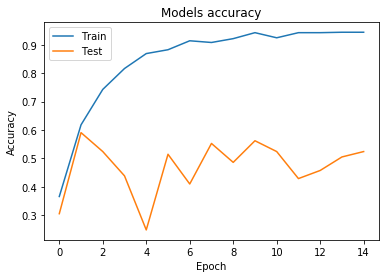

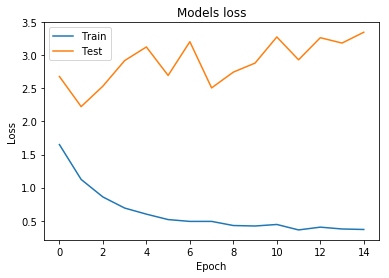

In [16]:
num_epochs = 15
batch_size = 35
x = 15
y = 120
z = 120
no_classes = 5
#write your model here
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1,2,2)))
model.add(Dropout(0.2))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv3D(32, kernel_size = (3,3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

learning_rate = 0.0099
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#print (model.summary())

train_generator = generator_15(train_path, train_doc, batch_size,'train')
val_generator = generator_15(val_path, val_doc, batch_size,'val')

model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Models accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Experimental model #3

Source path =  Project_data/val ; batch size = 35
Source path =  Project_data/train ; batch size = 35
Epoch 1/15
19/19 [==============================] - 50s 3s/step - loss: 1.4242 - categorical_accuracy: 0.5083 - val_loss: 6.3926 - val_categorical_accuracy: 0.3143

Epoch 00001: val_categorical_accuracy improved from -inf to 0.31429, saving model to model_init_2020-03-2012_09_57.074837/model-00001-1.42418-0.50827-6.39257-0.31429.h5
Epoch 2/15
19/19 [==============================] - 40s 2s/step - loss: 0.7359 - categorical_accuracy: 0.7714 - val_loss: 3.5511 - val_categorical_accuracy: 0.5048

Epoch 00002: val_categorical_accuracy improved from 0.31429 to 0.50476, saving model to model_init_2020-03-2012_09_57.074837/model-00002-0.73586-0.77143-3.55115-0.50476.h5
Epoch 3/15
19/19 [==============================] - 43s 2s/step - loss: 0.5585 - categorical_accuracy: 0.8722 - val_loss: 3.2761 - val_categorical_accuracy: 0.4476

Epoch 00003: val_categorical_accuracy did not improve from 0.5

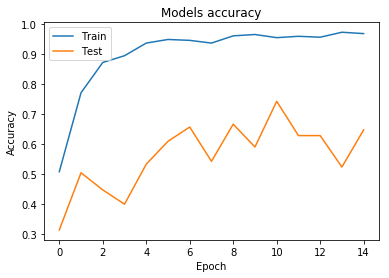

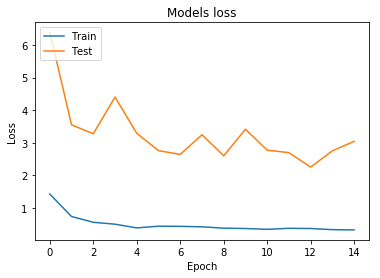

In [17]:
num_epochs = 15
batch_size = 35
x = 15
y = 120
z = 120
no_classes = 5
#write your model here
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2,2,2)))
#model.add(Dropout(0.2))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

learning_rate = 0.0099
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#print (model.summary())

train_generator = generator_15(train_path, train_doc, batch_size,'train')
val_generator = generator_15(val_path, val_doc, batch_size,'val')

model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Models accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Experimental model #4

Source path =  Project_data/val ; batch size = 35
Source path =  Project_data/train ; batch size = 35
Epoch 1/15
19/19 [==============================] - 50s 3s/step - loss: 1.3494 - categorical_accuracy: 0.4992 - val_loss: 3.8525 - val_categorical_accuracy: 0.4381

Epoch 00001: val_categorical_accuracy improved from -inf to 0.43810, saving model to model_init_2020-03-2012_09_57.074837/model-00001-1.34943-0.49925-3.85254-0.43810.h5
Epoch 2/15
19/19 [==============================] - 40s 2s/step - loss: 0.7395 - categorical_accuracy: 0.8045 - val_loss: 2.9301 - val_categorical_accuracy: 0.4381

Epoch 00002: val_categorical_accuracy did not improve from 0.43810
Epoch 3/15
19/19 [==============================] - 42s 2s/step - loss: 0.6262 - categorical_accuracy: 0.8451 - val_loss: 2.6638 - val_categorical_accuracy: 0.4667

Epoch 00003: val_categorical_accuracy improved from 0.43810 to 0.46667, saving model to model_init_2020-03-2012_09_57.074837/model-00003-0.62622-0.84511-2.66382-0.4666

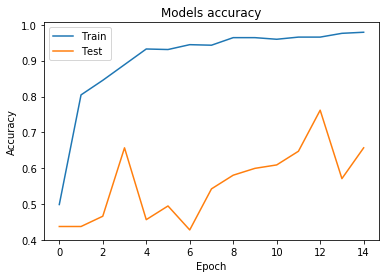

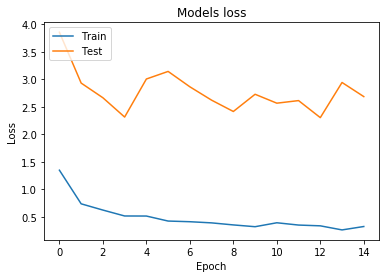

In [18]:
num_epochs = 15
batch_size = 35
x = 15
y = 120
z = 120
no_classes = 5
#write your model here
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2,2,2)))
#model.add(Dropout(0.2))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

learning_rate = 0.0099
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#print (model.summary())

train_generator = generator_15(train_path, train_doc, batch_size,'train')
val_generator = generator_15(val_path, val_doc, batch_size,'val')

model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Models accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Experimental Model #5
- Changed Learning rate to 0.005 

Source path =  Project_data/val ; batch size = 35
Source path =  Project_data/train ; batch size = 35
Epoch 1/15
19/19 [==============================] - 27s 1s/step - loss: 1.6871 - categorical_accuracy: 0.3323 - val_loss: 3.9758 - val_categorical_accuracy: 0.2571

Epoch 00001: val_categorical_accuracy improved from -inf to 0.25714, saving model to model_init_2020-03-2012_09_57.074837/model-00001-1.68705-0.33233-3.97584-0.25714.h5
Epoch 2/15
19/19 [==============================] - 20s 1s/step - loss: 1.1135 - categorical_accuracy: 0.5910 - val_loss: 2.7438 - val_categorical_accuracy: 0.4571

Epoch 00002: val_categorical_accuracy improved from 0.25714 to 0.45714, saving model to model_init_2020-03-2012_09_57.074837/model-00002-1.11350-0.59098-2.74379-0.45714.h5
Epoch 3/15
19/19 [==============================] - 23s 1s/step - loss: 0.8388 - categorical_accuracy: 0.7429 - val_loss: 2.4985 - val_categorical_accuracy: 0.5143

Epoch 00003: val_categorical_accuracy improved from 0.45714 to

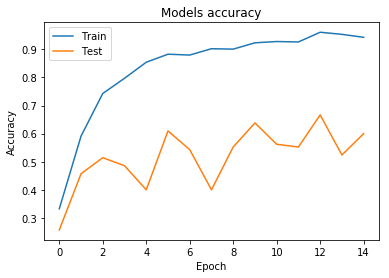

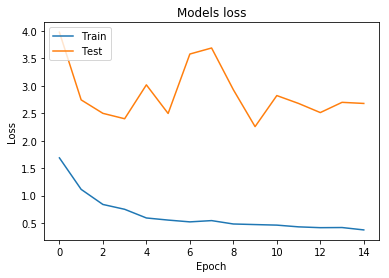

In [19]:
num_epochs = 15
batch_size = 35
x = 8
y = 120
z = 120
no_classes = 5
#write your model here
#Model 1 using 2 con3d layers, 2 maxpool 3d and 2 fully connected
#Result: There seems to be overfitting as the validation loss is increasing while train loss is increasing
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1,2,2)))
#model.add(Dropout(0.2))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

learning_rate = 0.005
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#print (model.summary())

train_generator = generator(train_path, train_doc, batch_size,'train')
val_generator = generator(val_path, val_doc, batch_size,'val')

model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Models accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Experimental model #6
-Learning rate =0.01

Source path = Source path =  Project_data/train ; batch size = 35
 Project_data/val ; batch size = 35
Epoch 1/15
19/19 [==============================] - 27s 1s/step - loss: 1.6459 - categorical_accuracy: 0.3789 - val_loss: 4.4681 - val_categorical_accuracy: 0.4000

Epoch 00001: val_categorical_accuracy improved from -inf to 0.40000, saving model to model_init_2020-03-2012_09_57.074837/model-00001-1.64594-0.37895-4.46815-0.40000.h5
Epoch 2/15
19/19 [==============================] - 20s 1s/step - loss: 1.0534 - categorical_accuracy: 0.6586 - val_loss: 2.9023 - val_categorical_accuracy: 0.3905

Epoch 00002: val_categorical_accuracy did not improve from 0.40000
Epoch 3/15
19/19 [==============================] - 23s 1s/step - loss: 0.7954 - categorical_accuracy: 0.7669 - val_loss: 3.1103 - val_categorical_accuracy: 0.3905

Epoch 00003: val_categorical_accuracy did not improve from 0.40000
Epoch 4/15
19/19 [==============================] - 22s 1s/step - loss: 0.6486 - categorical_accurac

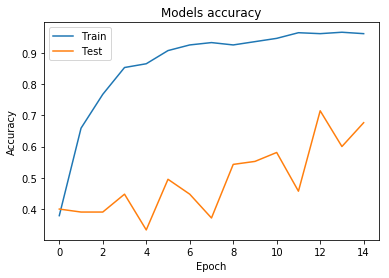

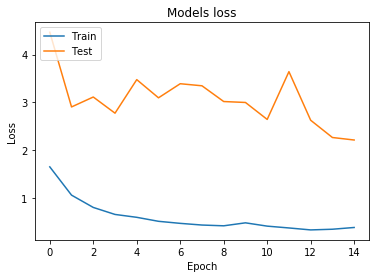

In [20]:
num_epochs = 15
batch_size = 35
x = 8
y = 120
z = 120
no_classes = 5
#write your model here
#Model 1 using 2 con3d layers, 2 maxpool 3d and 2 fully connected
#Result: There seems to be overfitting as the validation loss is increasing while train loss is increasing
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1,2,2)))
#model.add(Dropout(0.2))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.2))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

learning_rate = 0.01
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#print (model.summary())

train_generator = generator(train_path, train_doc, batch_size,'train')
val_generator = generator(val_path, val_doc, batch_size,'val')

model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Models accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Experiment #7
- changing batch size to 8
-  Learning rate = 0.018
- epoch = 25

Source path =  Project_data/val ; batch size = 8
Source path =  Project_data/train ; batch size = 8
Epoch 1/25
83/83 [==============================] - 24s 290ms/step - loss: 2.4765 - categorical_accuracy: 0.3133 - val_loss: 2.3847 - val_categorical_accuracy: 0.4135

Epoch 00001: val_categorical_accuracy improved from -inf to 0.41346, saving model to model_init_2020-03-2012_09_57.074837/model-00001-2.47653-0.31325-2.38471-0.41346.h5
Epoch 2/25
83/83 [==============================] - 20s 240ms/step - loss: 1.8914 - categorical_accuracy: 0.6084 - val_loss: 2.3434 - val_categorical_accuracy: 0.5000

Epoch 00002: val_categorical_accuracy improved from 0.41346 to 0.50000, saving model to model_init_2020-03-2012_09_57.074837/model-00002-1.89143-0.60843-2.34336-0.50000.h5
Epoch 3/25
83/83 [==============================] - 22s 266ms/step - loss: 1.7092 - categorical_accuracy: 0.6762 - val_loss: 1.9467 - val_categorical_accuracy: 0.6827

Epoch 00003: val_categorical_accuracy improved from 0.5

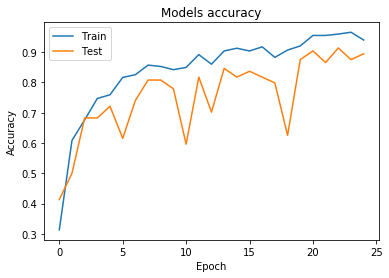

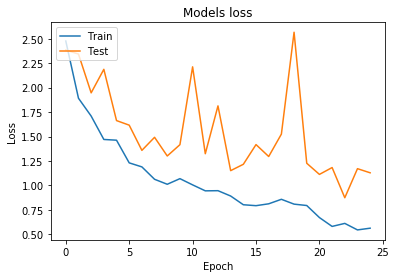

In [22]:
num_epochs = 25
batch_size = 8
x = 8
y = 120
z = 120
no_classes = 5
#write your model here
#Model 1 using 2 con3d layers, 2 maxpool 3d and 2 fully connected
#Result: There seems to be overfitting as the validation loss is increasing while train loss is increasing
model = Sequential()

model.add(Conv3D(16, kernel_size = (3,3,3),padding='same', input_shape=(x,y,z,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(1,2,2)))
#model.add(Dropout(0.05))

model.add(Conv3D(32, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.05))

model.add(Conv3D(64, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.3))

model.add(Conv3D(128, kernel_size = (3,3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(no_classes, activation = 'softmax'))

learning_rate = 0.018
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#print (model.summary())

train_generator = generator(train_path, train_doc, batch_size,'train')
val_generator = generator(val_path, val_doc, batch_size,'val')

model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Models accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Trying CNN+RNN model 

In [6]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 32 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 32


In [24]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from keras.applications import mobilenet_v2
from keras import optimizers
batch_size = 8
x = 8
y = 128
z = 128
no_classes = 5
#write your model here
mobile_net_1 = keras.applications.mobilenet.MobileNet(include_top = False, weights='imagenet',input_shape=(128, 128, 3))

model = Sequential()

model.add(TimeDistributed(mobile_net_1, input_shape = (8,128,128,3)))
model.add(TimeDistributed(Flatten()))
model.add(GRU(16, activation='relu',return_sequences=False))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(no_classes, activation = 'softmax'))

17227776/17225924 [==============================] - 2s 0us/step


In [25]:
learning_rate = 0.002
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 8, 4, 4, 1024)     3228864   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 8, 16384)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 16)                787248    
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
batch_normalization_52 (Batc (None, 16)                64        
_________________________________________________________________
activation_52 (Activation)   (None, 16)                0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
__________

In [26]:
train_generator = generator(train_path, train_doc, batch_size,img_sz=128)
val_generator = generator(val_path, val_doc, batch_size,img_sz=128)

In [27]:
model_name = 'model_init_rnn' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

In [28]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [29]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; batch size = 8
Source path =  Project_data/train ; batch size = 8
Epoch 1/32
83/83 [==============================] - 33s 404ms/step - loss: 1.7913 - categorical_accuracy: 0.3087 - val_loss: 1.5387 - val_categorical_accuracy: 0.4904

Epoch 00001: val_categorical_accuracy improved from -inf to 0.49038, saving model to model_init_rnn_2020-03-2013_43_21.002784/model-00001-1.79126-0.30873-1.53867-0.49038.h5
Epoch 2/32
83/83 [==============================] - 24s 285ms/step - loss: 1.3866 - categorical_accuracy: 0.4277 - val_loss: 1.2566 - val_categorical_accuracy: 0.6442

Epoch 00002: val_categorical_accuracy improved from 0.49038 to 0.64423, saving model to model_init_rnn_2020-03-2013_43_21.002784/model-00002-1.38663-0.42771-1.25657-0.64423.h5
Epoch 3/32
83/83 [==============================] - 24s 290ms/step - loss: 1.1697 - categorical_accuracy: 0.5527 - val_loss: 1.0818 - val_categorical_accuracy: 0.7115

Epoch 00003: val_categorical_accuracy improved 


Epoch 00030: val_categorical_accuracy did not improve from 0.93269

Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 31/32
83/83 [==============================] - 25s 300ms/step - loss: 0.4283 - categorical_accuracy: 0.9142 - val_loss: 0.5952 - val_categorical_accuracy: 0.8365

Epoch 00031: val_categorical_accuracy did not improve from 0.93269
Epoch 32/32
83/83 [==============================] - 25s 296ms/step - loss: 0.4001 - categorical_accuracy: 0.8916 - val_loss: 0.5242 - val_categorical_accuracy: 0.8846

Epoch 00032: val_categorical_accuracy did not improve from 0.93269


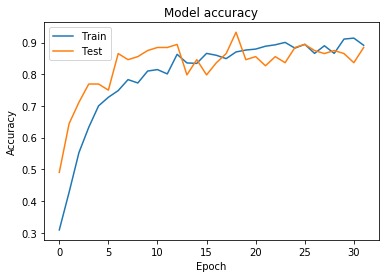

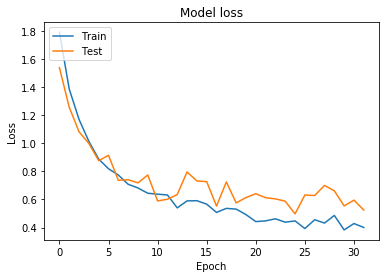

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## GRU Experiment #2

In [9]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from keras.applications import mobilenet_v2
from keras import optimizers
batch_size = 8
x = 8
y = 128
z = 128
no_classes = 5
#write your model here
mobile_net_1 = keras.applications.mobilenet.MobileNet(include_top = False, weights='imagenet',input_shape=(128, 128, 3))

model = Sequential()

model.add(TimeDistributed(mobile_net_1, input_shape = (8,128,128,3)))
model.add(TimeDistributed(Flatten()))
model.add(GRU(32, activation='relu',return_sequences=False))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(no_classes, activation = 'softmax'))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_3 (TimeDist (None, 8, 4, 4, 1024)     3228864   
_________________________________________________________________
time_distributed_4 (TimeDist (None, 8, 16384)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                1576032   
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
__________

83/83 [==============================] - 25s 297ms/step - loss: 0.2561 - categorical_accuracy: 0.9488 - val_loss: 0.7010 - val_categorical_accuracy: 0.8750

Epoch 00026: val_categorical_accuracy did not improve from 0.93269
Epoch 27/32
83/83 [==============================] - 25s 297ms/step - loss: 0.2561 - categorical_accuracy: 0.9473 - val_loss: 0.4904 - val_categorical_accuracy: 0.9231

Epoch 00027: val_categorical_accuracy did not improve from 0.93269
Epoch 28/32
83/83 [==============================] - 25s 301ms/step - loss: 0.2805 - categorical_accuracy: 0.9458 - val_loss: 0.3373 - val_categorical_accuracy: 0.9327

Epoch 00028: val_categorical_accuracy did not improve from 0.93269
Epoch 29/32
83/83 [==============================] - 25s 299ms/step - loss: 0.2738 - categorical_accuracy: 0.9413 - val_loss: 0.5488 - val_categorical_accuracy: 0.8750

Epoch 00029: val_categorical_accuracy did not improve from 0.93269
Epoch 30/32
83/83 [==============================] - 25s 302ms/step 

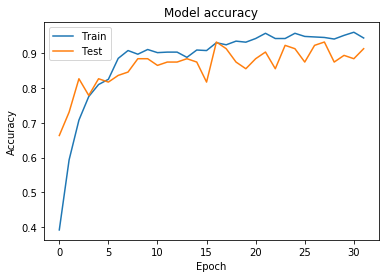

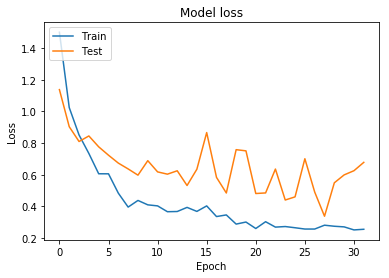

In [10]:
learning_rate = 0.002
optimiser = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.8, nesterov=True)#write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())
train_generator = generator(train_path, train_doc, batch_size,img_sz=128)
val_generator = generator(val_path, val_doc, batch_size,img_sz=128)
model_name = 'model_init_rnn' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=0.00001, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()